In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [336]:
df = pd.read_csv('hr_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

In [337]:
df.shape

(14999, 10)

### Finding the dependence of salary on the Departments

In [338]:
df['Department'].nunique()

10

In [401]:
UniqueDepartments = df['Department'].unique()
UniqueDepartments

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [340]:
low_salary = df[df.salary=='low']
low_salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [341]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [342]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [343]:
low_salary_dep=low_salary['Department'].value_counts()
low_salary_dep

sales          2099
technical      1372
support        1146
IT              609
product_mng     451
marketing       402
RandD           364
accounting      358
hr              335
management      180
Name: Department, dtype: int64

Text(0, 0.5, 'No.of employees')

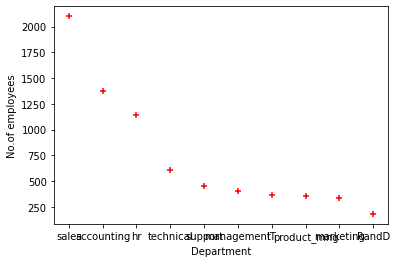

In [344]:
plt.scatter(UniqueDepartments, low_salary_dep, color='red', marker='+')
plt.xlabel("Department")
plt.ylabel('No.of employees')

In [345]:
medium_salary = df[df.salary=='medium']
medium_salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
60,0.85,0.91,5,226,5,0,1,0,management,medium
61,0.11,0.93,7,308,4,0,1,0,IT,medium
62,0.10,0.95,6,244,5,0,1,0,IT,medium


In [346]:
medium_salary_dep = medium_salary['Department'].value_counts()
medium_salary_dep

sales          1772
technical      1147
support         942
IT              535
product_mng     383
marketing       376
RandD           372
hr              359
accounting      335
management      225
Name: Department, dtype: int64

Text(0, 0.5, 'No.of employees')

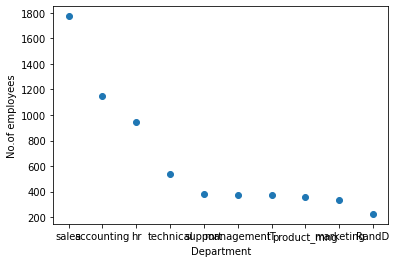

In [347]:
plt.scatter(UniqueDepartments,medium_salary_dep)
plt.xlabel("Department")
plt.ylabel('No.of employees')

In [348]:
high_salary = df[df.salary=='high']
high_salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high


In [349]:
high_salary.shape

(1237, 10)

In [350]:
high_salary_dep = high_salary['Department'].value_counts()
high_salary_dep

sales          269
management     225
technical      201
support        141
IT              83
marketing       80
accounting      74
product_mng     68
RandD           51
hr              45
Name: Department, dtype: int64

Text(0, 0.5, 'No.of employees')

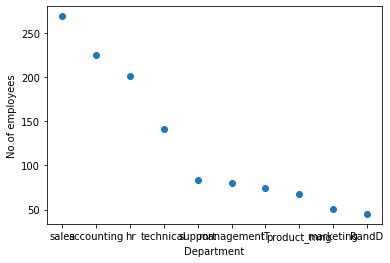

In [351]:
plt.scatter(UniqueDepartments, high_salary_dep)
plt.xlabel("Department")
plt.ylabel('No.of employees')

In [352]:
salary_range = df['salary'].value_counts()
salary_range

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

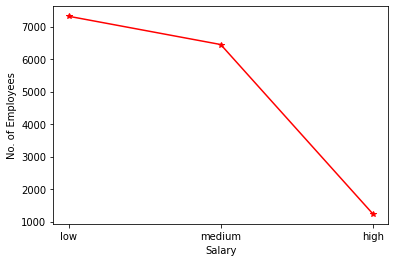

In [353]:
plt.xlabel('Salary')
plt.ylabel('No. of Employees')
plt.plot(salary_range, color='red',marker='*')

### Visulaization of data relation with the promotion in last 5 years

In [354]:
promotions = df['promotion_last_5years'].value_counts()
promotions

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [355]:
promotion_low_salary = low_salary['promotion_last_5years'].value_counts()
promotion_low_salary

0    7250
1      66
Name: promotion_last_5years, dtype: int64

In [356]:
promotion_medium_salary = medium_salary['promotion_last_5years'].value_counts()
promotion_medium_salary

0    6265
1     181
Name: promotion_last_5years, dtype: int64

In [357]:
promotion_high_salary = high_salary['promotion_last_5years'].value_counts()
promotion_high_salary

0    1165
1      72
Name: promotion_last_5years, dtype: int64

### Visualization of data to see relation of retention of employees with the salary and promotion

In [358]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [359]:
low_salary_left=low_salary['left'].value_counts()
low_salary_left

0    5144
1    2172
Name: left, dtype: int64

In [360]:
medium_salary_left = medium_salary['left'].value_counts()
medium_salary_left

0    5129
1    1317
Name: left, dtype: int64

In [361]:
high_salary_left = high_salary['left'].value_counts()
high_salary_left

0    1155
1      82
Name: left, dtype: int64

In [362]:
promotion_left=df['left'].value_counts()
promotion_left

0    11428
1     3571
Name: left, dtype: int64

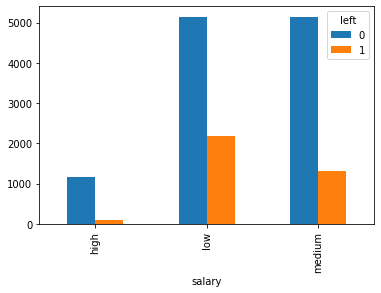

In [363]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

From the above we can see that the major factors affecting the retention of the employees is the satisfaction level, the monthly hours, salary and the promotion. The department and work accident donot seem to have a lot of effect on the employee retention

## Date Preprocessing

In [364]:
subdf = df[['satisfaction_level','promotion_last_5years','average_montly_hours','salary']]
subdf.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary
0,0.38,0,157,low
1,0.80,0,262,medium
2,0.11,0,272,medium
3,0.72,0,223,low
4,0.37,0,159,low


Handling the string type of salary

In [365]:
dummies_salary = pd.get_dummies(subdf['salary'], prefix='salary')
dummies_salary.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [366]:
subdf_dummies = pd.concat([subdf,dummies_salary], axis='columns')
subdf_dummies

,satisfaction_level,promotion_last_5years,average_montly_hours,salary,salary_high,salary_low,salary_medium
0,0.38,0,157,low,0,1,0
1,0.80,0,262,medium,0,0,1
2,0.11,0,272,medium,0,0,1
3,0.72,0,223,low,0,1,0
4,0.37,0,159,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,0,151,low,0,1,0
14995,0.37,0,160,low,0,1,0
14996,0.37,0,143,low,0,1,0
14997,0.11,0,280,low,0,1,0


In [367]:
subdf_dummies.drop('salary', axis='columns',inplace=True)
subdf_dummies.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,0,157,0,1,0
1,0.80,0,262,0,0,1
2,0.11,0,272,0,0,1
3,0.72,0,223,0,1,0
4,0.37,0,159,0,1,0


#### Scaling the average monthly hours

In [370]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
subdf_dummies['average_montly_hours']=scaler.fit_transform(subdf_dummies[['average_montly_hours']])
subdf_dummies.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,0,0.285047,0,1,0
1,0.80,0,0.775701,0,0,1
2,0.11,0,0.822430,0,0,1
3,0.72,0,0.593458,0,1,0
4,0.37,0,0.294393,0,1,0


### Training model of Logistic Regression

In [377]:
X = subdf_dummies
X.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,0,0.285047,0,1,0
1,0.80,0,0.775701,0,0,1
2,0.11,0,0.822430,0,0,1
3,0.72,0,0.593458,0,1,0
4,0.37,0,0.294393,0,1,0


In [378]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape

(11999, 6)

In [381]:
X_test.shape

(3000, 6)

### Using Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7663333333333333

### Using Random Forest Classifier

In [392]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.9386666666666666

### Using Support Vector Machine

In [397]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8416666666666667

### Using multinomial naive bayes classifier

In [399]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.7583333333333333